In [322]:
import numpy as np
def high_order_tm(m,n,L,W,e_r,h):
    c0 = 2.99702547e8 # Approximatilly Light velocity in air
    # Computing effective dieletric constant
    if m == 0 and n != 0: # m = 0 and n integer
        eef_L = (e_r+1)/2 + ((e_r-1)/2)*(1/np.sqrt(1+12*(1/(L/h)))) # Compute permittivity relative effective on L-patch
        eef = eef_L
        print("eef:\n", eef)
    elif m != 0 and n == 0:
        eef_W = (e_r+1)/2 + ((e_r-1)/2)*(1/np.sqrt(1+12*(1/(W/h))))
        eef = eef_W
        print("eef:\n", eef)
    elif m != 0  and n != 0:
        eef_W = (e_r+1)/2 + ((e_r-1)/2)*(1/np.sqrt(1+12*(1/(W/h))))
        eef_L = (e_r+1)/2 + ((e_r-1)/2)*(1/np.sqrt(1+12*(1/(L/h))))
        eef = (eef_L*eef_W)/e_r
        print("eef_L:\n", eef_L)
        print("eef_W:\n", eef_W)
        print("eef:\n", eef)
    # Increasing the edge's resonator due to fringe effect
    if m == 0 and n != 0:
        delta_L = 0.412*h*((eef_L + 0.3)*(L/h + 0.264))/((eef_L - 0.258)*(L/h + 0.8))
        delta_W = 0
        print("delta_L [mm]:\n",delta_L*1e3)
    elif m != 0 and n == 0:
        delta_W = 0.412*h*((eef_W + 0.3)*(W/h + 0.264))/((eef_W - 0.258)*(W/h + 0.8))
        delta_L = 0
        print("delta_W [mm]:\n",delta_W*1e3)
    elif m != 0  and n != 0:
        delta_W = 0.412*h*((eef_W + 0.3)*(W/h + 0.264))/((eef_W - 0.258)*(W/h + 0.8))
        delta_L = 0.412*h*((eef_L + 0.3)*(L/h + 0.264))/((eef_L - 0.258)*(L/h + 0.8))
        print("delta_L [mm]:\n",delta_L*1e3)
        print("delta_W [mm]:\n",delta_W*1e3)
    # Frequency resonance
    fr_mn = (c0/(2*np.sqrt(eef)))*np.sqrt((m/(L+2*delta_L))**2+(n/(W+2*delta_W))**2)
    print("freq [GHz]:\n",fr_mn/1e9)
    return fr_mn

In [385]:
m = 3; n = 0 # Higher-Order n and m at TMmn
L = 60e-3; W = 60e-3 # Patch length and width
e_r = 2.2; h = 1.575e-3 # permittivity relative and height antenna
freq = high_order_tm(m,n,L,W,e_r,h)

eef:
 2.123224864236337
delta_W [mm]:
 0.8314072986134977
freq [GHz]:
 5.142004433410456


$\textbf{Representation Field for Electric Component}$

$E_\theta = E_0\cos\phi f(\theta,\phi),$

$E_\phi= -E_0\cos\theta\sin\phi f(\theta,\phi),$

$$f(\theta,\phi) = \frac{\sin\bigg[\frac{\beta W_p}{2}\sin\theta\sin\phi\bigg]}{\bigg[\frac{\beta W_p}{2}\sin\theta\sin\phi \bigg]}\cos\bigg(\frac{\beta L_p}{2}\sin\theta\cos\phi\bigg),$$

$\beta=\frac{2\pi}{\lambda} \,\, \text{(phase constant).}$

$\text{Where,} \,\, E_0 \equiv \, \text{constant representing the maximum magnitude of field;}$

$E_\phi \, \equiv \, \text{azimuthal component of electric field vector;}$

$E_\theta \, \equiv \, \text{elevation component of electric field vector.}$

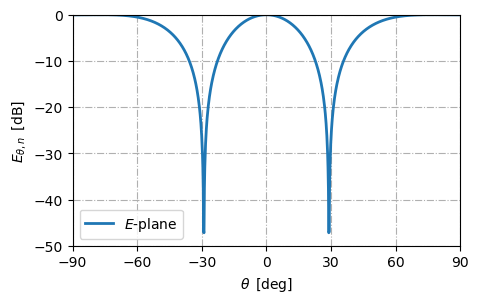

In [386]:
import numpy as np
import matplotlib.pyplot as plt

c0 = 2.99792458e8 # light velocity
lambda_0 = c0/freq # wavelength in free space
# Coordenates System
theta_deg = np.linspace(-90.0,90.0,1001) # elevation angular in degree
theta_rad = theta_deg*(np.pi/180)
# Physical parameters
Lp = L # Length of patch
Wp = W # Width od patch
beta = (2*np.pi)/lambda_0 # Phase constant in free space
# Computing the electric component fields
E_theta = np.cos(beta*Lp*np.sin(theta_rad)/2) # E-plane with phi = 0
E_theta_norm = 20*np.log10(np.abs(E_theta))
# Plotting figure
lw = 2 # Linewidth
plt.figure(figsize=(5,3))
plt.plot(theta_deg, E_theta_norm.real,lw=lw,label="$E$-plane")
plt.xlabel(r"$\theta \, $ [deg]")
plt.ylabel(r"$E_{\theta,n} \,$ [dB]")
plt.xticks([-90,-60,-30,0,30,60,90])
plt.ylim([-50,0])
plt.xlim([-90,90])
plt.grid(ls="-.")
plt.legend(loc="best")
plt.show()

C:\Users\Bernardo\AppData\Local\Temp\ipykernel_15036\1034542884.py:1: RuntimeWarning: invalid value encountered in divide
  E_phi = np.cos(theta_rad)*(np.sin((beta*Wp*np.sin(theta_rad))/2)/((beta*Wp*np.sin(theta_rad))/2))


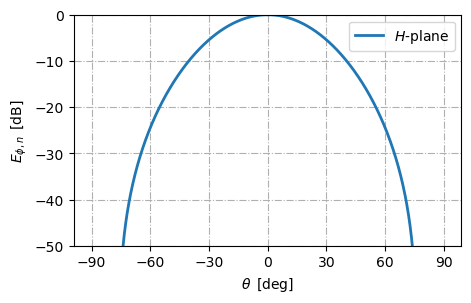

In [387]:
E_phi = np.cos(theta_rad)*(np.sin((beta*Wp*np.sin(theta_rad))/2)/((beta*Wp*np.sin(theta_rad))/2))
E_phi_norm = 20*np.log10(np.abs(E_phi))
#Plotting figure
plt.figure(figsize=(5,3))
plt.plot(theta_deg,E_phi_norm,lw=lw,label="$H$-plane")
plt.legend(loc="best")
plt.xlabel(r"$\theta \,$ [deg]")
plt.ylabel(r"$E_{\phi,n} \,$ [dB]")
plt.xticks([-90,-60,-30,0,30,60,90])
plt.grid(ls="-.")
plt.yticks([0,-10,-20,-30,-40,-50])
plt.ylim([-50,0])
plt.show()

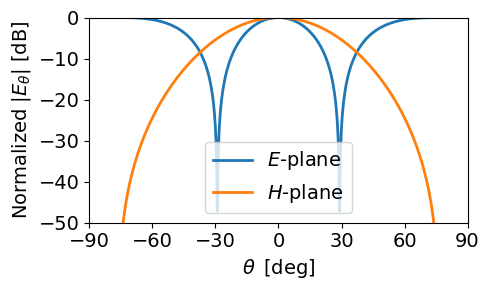

In [390]:
fs = 14 # fontsize
plt.figure(figsize=(5,3))
plt.plot(theta_deg,E_theta_norm,lw=lw,label="$E$-plane")
plt.plot(theta_deg,E_phi_norm,lw=lw,label="$H$-plane")
plt.legend(loc="best",fontsize=fs)
plt.ylabel(r"Normalized $|E_\theta|$ [dB]",fontsize=fs)
plt.xlabel(r"$\theta \,$ [deg]",fontsize=fs)
plt.xticks([-90,-60,-30,0,30,60,90],fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlim([-90,90])
plt.ylim([-50,0])
plt.savefig(f"C:/Users/Bernardo/Documents/2023_master_degree_helton_bernardo/figs/TMmn_plot_graphic/TM{m}{n}_rectang_plot_W_{int(Wp*1e3)}_L_{int(Lp*1e3)}.svg",format="svg",
            bbox_inches="tight")
#plt.text(-35,-30,f' $\, L_p =$ {Lp*1e3} mm \n $W_p =$ {Wp*1e3} mm',fontsize=11.5)
#plt.grid(ls="-.")
plt.tight_layout()
plt.show()

C:\Users\Bernardo\AppData\Local\Temp\ipykernel_15036\2957116632.py:5: RuntimeWarning: invalid value encountered in divide
  E_phi = np.cos(theta_r)*(np.sin((beta*Wp*np.sin(theta_r))/2)/((beta*Wp*np.sin(theta_r))/2))


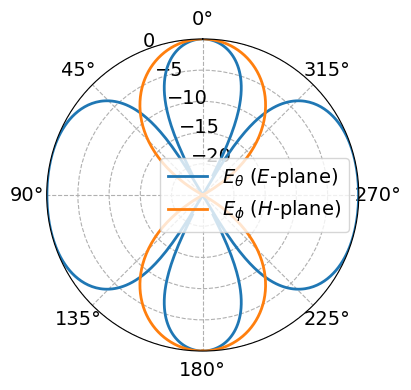

In [389]:
import matplotlib.pyplot as plt
theta = np.linspace(-180,180,501)
theta_r = np.radians(theta)
E_theta = np.cos(beta*Lp*np.sin(theta_r)/2)
E_phi = np.cos(theta_r)*(np.sin((beta*Wp*np.sin(theta_r))/2)/((beta*Wp*np.sin(theta_r))/2))
fig,ax = plt.subplots(subplot_kw={'projection':'polar'},figsize=(8,4))
ax.plot(theta_r,20*np.log10(np.abs(E_theta)),lw=2,label=r"$E_\theta$ ($E$-plane)")
ax.plot(theta_r,20*np.log10(np.abs(E_phi)),lw=2,label=r"$E_\phi$ ($H$-plane)")
ax.tick_params(axis='both', which='major',labelsize=fs)
ax.set_rlim([-25,0])
ax.set_theta_zero_location("N")
ax.legend(loc="best",fontsize=fs)
ax.grid(ls='--')
fig.savefig(f"C:/Users/Bernardo/Documents/2023_master_degree_helton_bernardo/figs/TMmn_plot_graphic/TM{m}{n}_polar_plot_W_{int(Wp*1e3)}_L_{int(Lp*1e3)}.svg",format="svg")
plt.tight_layout()
plt.show()